<center><h1 class="background-title">Workshop 08 - Background<br>Linear Logistic Regression</h1></center>

## Logistic Regression

The logistic regression method tries to solve a classification problem following a discriminative approach. It seeks to estimate the conditional probability of the label given the measurements: $p\left(y|\boldsymbol{x}\right)$.

The logic regression algorithm tries to estimates the conditional distribution using the following model:

$$
p\left(y=k|\boldsymbol{x}\right)=\frac{e^{f_k\left(\boldsymbol{x}\right)}}{\sum_\tilde{k}e^{f_\tilde{k}\left(\boldsymbol{x}\right)}}
$$

Where $f_k\left(\boldsymbol{x}\right),k\in\left\{0,1,\ldots,K-1\right\}$ are $K$ pre-define functions which correspond to the $K$ possible classes which the label $y$ can take. 

Usually, The functions $f_k$ are selected to be a single parametric function $f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_k\right)$ with $K$ different sets of parameters $\boldsymbol{\theta}_k$. I.e., the following model is used:

$$
p\left(y=k|\boldsymbol{x}\right)=\frac{e^{f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_k\right)}}{\sum_\tilde{k}e^{f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_\tilde{k}\right)}}
$$

Because this model is only defined by the ratios between the $f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_k\right)$'s it has a large degree of freedom in selecting the parameters $\boldsymbol{\theta}_k$. This degree of freedom can be removed by setting $\boldsymbol{\theta}_0$ to some values such that $f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_0\right)=0$. We are then left to estimate only $K-1$ sets of parameters.

These model's parameters are usually estimated using MLE.

### The binary case

In the case of two classes the model becomes:

$$
p\left(y=0|\boldsymbol{x}\right)=\frac{e^{f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_0\right)}}{e^{f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_0\right)}+e^{f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_1\right)}}=\frac{1}{1+e^{f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_1\right)}}
$$

and

$$
p\left(y=1|\boldsymbol{x}\right)=\frac{e^{f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_1\right)}}{e^{f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_0\right)}+e^{f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_1\right)}}=\frac{1}{1+e^{-f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_1\right)}}
$$

The function:

$$
g\left(x\right)=\frac{1}{1+e^{-x}}
$$

Is called the **logistic function** which gives this method its name. By using the logistic function, we can write our model as:

$$
p\left(y=0|\boldsymbol{x}\right)=g\left(-f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_1\right)\right)
$$

$$
p\left(y=1|\boldsymbol{x}\right)=g\left(f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_1\right)\right)
$$

## Linear Logistic Regression

In the case where $f$ is selected to be a linear function of $\boldsymbol{x}$:

$$
f\left(\boldsymbol{x}\ ;\boldsymbol{\theta}_k\right)=\boldsymbol{\theta}_k^T\boldsymbol{x}
$$

The model is called linear logistic regression.

In order to add a bias term to the linear function we can add a 1 to the vector of measurements $\boldsymbol{x}$, i.e. $\boldsymbol{x}=\left(x_0,x_1,\ldots,x_M\right)^T\rightarrow\left(x_0,x_1,\ldots,x_M,1\right)^T$

### Relation to LDA

It is interesting to note that it can be shown that the model we get in the linear case for $p\left(y|\boldsymbol{x}\right)$, has the same form of the model which results for $p\left(y|\boldsymbol{x}\right)$ in LDA. I.e., the assumption that $p\left(\boldsymbol{x}|y=k\right)$ has a multivariate normal distribution with a covariance matrix which does not depend on $k$ leads to a model with is a special case of the linear logistic regression model.

## Gradient Descent

The family of gradient descent algorithms tries to solve an $\arg\min$ optimization problem of the form:

$$
\boldsymbol{\theta}^*=\underset{\boldsymbol{\theta}}{\arg\min}\ h\left(\boldsymbol{\theta}\right)
$$

They do so by starting from some random point $\boldsymbol{\theta}^{\left(0\right)}$, and then following the direction of the gradient in order to converge to some local minimum.

In it's most basic form the algorithm is implemented as follow:

1. Start from a random point $\boldsymbol{\theta}^{\left(0\right)}$
2. In each iteration update $\boldsymbol{\theta}$ according to:
$$
\boldsymbol{\theta}^{\left(k+1\right)}=\boldsymbol{\theta}^{\left(k\right)} - \alpha\nabla_\theta h\left(\boldsymbol{\theta^{\left(k\right)}}\right)
$$
Where $\alpha$ is some pre-defined constant which controls the updates steps size. This parameter is called the learning rate.

3. Continue until the updates result in a minor change to $f\left(\boldsymbol{\theta^{\left(k\right)}}\right)$, i.e., when:
$$
\left|h\left(\boldsymbol{\theta^{\left(k+1\right)}}\right) - h\left(\boldsymbol{\theta^{\left(k\right)}}\right)\right| < \varepsilon
$$
Where $\varepsilon$ is some pre-defined small constant which is usually referred to as the tolerance.

### Some Known Issues 

In most cases, this algorithm, in its basic form, is not very useful. This is mainly due to the problem of selecting an appropriate learning rate $\alpha$, and due to its slow convergence. As it turns out, the task of selecting the learning rate is not a simple task, a learning rate which is too large will prevent the algorithm from converging, while a learning rate which is too small will result in a very slow convergence, even up to the point where the algorithm becomes impractical to use.

In addition, in many cases, even when using the optimal learning rate, the converges can still be very slow. This is especially common for function in high dimension.

Luckily a few small improvements to the algorithm can significantly reduce these problems. Some of the commonly used methods improve the basic algorithm by:

1. Adding momentum.
2. Using adaptive learning rates.
3. Adding stochasticness to the algorithm.

We will not elaborate much about this subject in this course, but the two following blogs give a great overview of the subject:

- [An overview of gradient descent optimization algorithms](http://ruder.io/optimizing-gradient-descent/)
- [Why Momentum Really Works](https://distill.pub/2017/momentum/)

<center><h1 class="workshop-title">Workshop 08<br>Linear Logistic Regression</h1></center>

## 🦠 Dataset: Breast Cancer Wisconsin

We will return to the same dataset of the **Breast Cancer Wisconsin Diagnostic**, which can be found [here](https://yairomer.github.io/ml_course/datasets/breast_cancer.csv).

## ❓️ Problem: Predict the Correct Diagnostic

Giving a prediction of whether or not a tissue is malignant (cancerous) or benign (non-cancerous) based on the features extracted from the tissue's microscope image.

## 🔃 The Workflow

<center><img src="../media/diagrams/workflow/workflow_full.png" width="300px" style="width:300px"/></center>

## 🛠️ Preparations

In [ ]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
from mpl_toolkits.mplot3d import Axes3D  # Support for 3D plotting in matplotlib
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}  # Fixing some bug with the size of 3D figures in Jupyter

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] =120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## A function to add Latex (equations) to output which works also in Google Colabrtroy
## In a regular notebook this could simply be replaced with "display(Markdown(x))"
from IPython.display import HTML
def print_math(x):  # Define a function to preview markdown outputs as HTML using mathjax
    display(HTML(''.join(['<p><script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\\\(\',\'\\\\)\']]}});</script><script src=\'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_CHTML\'></script>',x,'</p>'])))

## 🕵️ Data Inspection

In [ ]:
data_file = 'https://yairomer.github.io/ml_course/datasets/breast_cancer.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
print_math('Number of rows in the dataset: $N={}$'.format(number_of_rows))

## Show the first 10 rows
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## The Data Fields and Types

We will start by working with the diagnosis and the first two features:

- **diagnosis** - The correct diagnosis: M = malignant (cancerous), B = benign (non-cancerous)
- **radius_mean** - The average radius of the cells in the sample.
- **texture_mean** - The average standard deviation of gray-scale values of the cells in the sample.

We will later add all the rest of the 30 features.

### Plotting the data

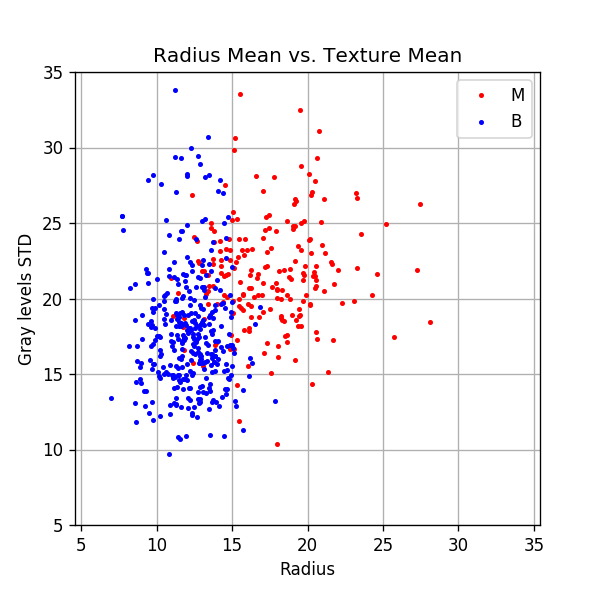

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)
ax.axis('equal')

ax.plot(dataset.query('diagnosis == "M"')['radius_mean'].values, 
        dataset.query('diagnosis == "M"')['texture_mean'].values,
        '.r', markersize=4, label='M')
ax.plot(dataset.query('diagnosis == "B"')['radius_mean'].values, 
        dataset.query('diagnosis == "B"')['texture_mean'].values,
        '.b', markersize=4, label='B')
ax.legend()
ax.set_xlim(5, 35)
ax.set_ylim(5, 35)
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD');

## 📜 Problem Definition - Same as before, written differently

For the following given random system:

- Random sample: $\omega$ - A sampled tissue drawn from some unknown distribution of all possible tissues.
- Random variables:
  - $x_0=X_0\left(\omega\right)$: The average radius of the cells in the sample.
  - $x_1=X_1\left(\omega\right)$: The average standard deviation of gray-scale values of the cells in the sample.
  - $y=Y\left(\omega\right)$: Whether the sample is 1 - cancerous (malignant) or 0 - not cancerous (benign).

Find a binary discrimination function $\hat{y}=h^*\left(\boldsymbol{x}\right)$ which minimizes the misclassification rate:

$$
h^*=\underset{h}{\arg\min}\ E\left[I\left\{h\left(\boldsymbol{x}\right)\neq y\right\}\right]
$$

### 📚 Splitting the dataset

In [ ]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 60% train / 20% validation / 20% test
n_samples_train = int(n_samples * 0.6)
n_samples_validation = int(n_samples * 0.2)
n_samples_test = n_samples - n_samples_train - n_samples_validation
train_indices = indices[:n_samples_train]
validation_indices = indices[n_samples_train:(n_samples_train + n_samples_validation)]
test_indices = indices[(n_samples_train + n_samples_validation):]

train_set = dataset.iloc[train_indices]
validation_set = dataset.iloc[validation_indices]
test_set = dataset.iloc[test_indices]

## 💡 Model & Learning Method Suggestion: Linear Logistic Regression

We will use the linear logistic regression algorithm for generating our discrimination function.

We will use a basic gradient descent algorithm to find the parameters $\boldsymbol{\theta}$.

In this case, the hyper-parameters of our method are the gradient descent parameters.

## ⚙️ Learning

### The MLE optimization problem

Using the linear logistic regression method, we would like to estimate $p\left(y|\boldsymbol{x};\boldsymbol{\theta}\right)$ using the following model:

$$
p\left(y=1|\boldsymbol{x};\boldsymbol{\theta}\right)=1-p\left(y=0|\boldsymbol{x};\boldsymbol{\theta}\right)=g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)=\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}}}
$$

Where $g\left(x\right)=\frac{1}{1-e^{-x}}$ is the logistic function.



To find the optimal parameters $\boldsymbol{\theta}^*$ we need to solve the following MLE problem:

Here $\mathcal{L}$ is the likelihood function and $l$ is the log-likelihood function:

$$
\begin{align*}
\boldsymbol{\theta}^*
& = \underset{\boldsymbol{\theta}}{\arg\max}\ \mathcal{L}\left(\boldsymbol{\theta};\left\{\boldsymbol{x}_i,y_i\right\}\right) \\
& = \underset{\boldsymbol{\theta}}{\arg\min}\ -l\left(\boldsymbol{\theta};\left\{y_i,\boldsymbol{x}_i\right\}\right) \\
& = \underset{\boldsymbol{\theta}}{\arg\min}-\sum_i\log\left(p\left(y_i|\boldsymbol{x}_i;\boldsymbol{\theta}\right)\right) \\
& = \underset{\boldsymbol{\theta}}{\arg\min}-\sum_i\log\left(p\left(1|\boldsymbol{x}_i;\boldsymbol{\theta}\right)\right)I\left\{y_i=1\right\} + \log\left(1-p\left(1|\boldsymbol{x}_i;\boldsymbol{\theta}\right)\right)I\left\{y_i=0\right\} \\
& = \underset{\boldsymbol{\theta}}{\arg\min}\underbrace{-\frac{1}{N}\sum_i\log\left(g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)\right)y_i + \log\left(1-g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)\right)\left(1-y_i\right)}_{=h\left(\boldsymbol{\theta};\left\{\boldsymbol{x}_i,y_i\right\}\right)} \\
\end{align*}
$$

Just for convenience, we have added a normalization by the number of samples, $\frac{1}{N}$, which does not change the optimization problem, but prevents the objective function (and it's gradient) from scaling up with the number of samples.

We have defined:

$$
h\left(\boldsymbol{\theta};\left\{\boldsymbol{x}_i,y_i\right\}\right)=-\frac{1}{N}\sum_i\log\left(g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)\right)y_i + \log\left(1-g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)\right)\left(1-y_i\right)
$$

($h$ here is not the discrimination function)

### Basic gradient descent

To solve this optimization problem, we shall implement the basic gradient descent solver:

1. Start from a random vector of parameters $\boldsymbol{\theta}^{\left(0\right)}$
2. In each iteration update $\boldsymbol{\theta}$ according to:
$$
\boldsymbol{\theta}^{\left(k+1\right)}=\boldsymbol{\theta}^{\left(k\right)} - \alpha\nabla_\theta h\left(\boldsymbol{\theta^{\left(k\right)}}\right)
$$
3. Stop when:
$$
\left|h\left(\boldsymbol{\theta^{\left(k+1\right)}}\right) - h\left(\boldsymbol{\theta^{\left(k\right)}}\right)\right| < \varepsilon
$$

To calculate $\nabla_\theta f\left(\boldsymbol{\theta^{\left(k\right)}}\right)$ we shall use the following properties:

- $\frac{d}{dx}g\left(x\right)=g\left(x\right)\left(1-g\left(x\right)\right)$
- $\frac{d}{dx}\log\left(g\left(x\right)\right)=1-g\left(x\right)$
- $\frac{d}{dx}\log\left(1-g\left(x\right)\right)=-g\left(x\right)$
- $\nabla_\theta f\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)=f'\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)\boldsymbol{x}$

Therefore:
$$
\begin{align*}
\nabla_\theta h\left(\boldsymbol{\theta}\right)
& = -\frac{1}{N}\sum_i\left(\left(1-g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)\right)y_i - g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)\left(1-y_i\right)\right)\boldsymbol{x}_i \\
& = \frac{1}{N}\sum_i\left(g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)-y_i\right)\boldsymbol{x}_i
\end{align*}
$$


### Early stop as a regularization

A common practice in machine learning when using gradient descent is to test the stop criteria on a validation set. In many cases, this prevents the model from converging an overfitted solution.

### Implementation

In [ ]:
## Prepare the data
## ================

## Define x & y for the train set
x_train = train_set[['radius_mean', 'texture_mean']].values
y_train = train_set['diagnosis'].values == 'M'

## Define x & y for the validation set
x_val = validation_set[['radius_mean', 'texture_mean']].values
y_val = validation_set['diagnosis'].values == 'M'

## Define x & y for the test set
x_test = test_set[['radius_mean', 'texture_mean']].values
y_test = test_set['diagnosis'].values == 'M'

## Define x_tilde which is the augmented x with the additional 1 at the end
x_tilde_train = np.concatenate((x_train, np.ones((n_samples_train, 1))), axis=1)
x_tilde_val = np.concatenate((x_val, np.ones((n_samples_validation, 1))), axis=1)
x_tilde_test = np.concatenate((x_test, np.ones((n_samples_test, 1))), axis=1)

## The objective function
## ======================
## Define the logistice function
def g(x):
    return 1 / (1 + np.exp(-x))

## Define the objective function
def h(theta, x_tilde, y):
    dot_product = x_tilde @ theta
    return -(np.log(g(dot_product)) * y + np.log(1 - g(dot_product)) * (1- y)).mean()

## Define the gradient of h
def grad_h(theta, x_tilde, y):
    dot_product = x_tilde @ theta
    return ((g(dot_product) - y) @ x_tilde) / len(x_tilde)

## The gradient decent algorithm
## =============================
def basic_gradient_decent(h, grad_h, alpha, tol, max_iter, x_tilde_train, y_train, x_tilde_val, y_val, store_every=1):
    ## Initialize theta
    theta = np.zeros(x_tilde_train.shape[1])

    ## Calucalte the initial objective
    last_objective = h(theta, x_tilde_val, y_val)

    ## Initialize lists to store intermidiate results for plotting
    steps_list = [0]
    theta_list = [theta.copy()]
    objective_list_train = [h(theta, x_tilde_train, y_train)]
    objective_list_val = [h(theta, x_tilde_val, y_val)]

    ## Perforing the update steps
    i_iter = 0
    while True:
        i_iter += 1

        ## Update theta
        theta -= alpha * grad_h(theta, x_tilde_train, y_train)

        ## Calculate the new objective
        objective = h(theta, x_tilde_val, y_val)

        ## Store intermidiate results
        if i_iter % store_every == 0:
            steps_list.append(i_iter)
            theta_list.append(theta.copy())
            objective_list_train.append(h(theta, x_tilde_train, y_train))
            objective_list_val.append(h(theta, x_tilde_val, y_val))

        ## Check the stop criteria
        if (np.abs(objective - last_objective) < tol) or (i_iter == max_iter):
            break
        last_objective = objective

    ## Plot results
    ## ============
#     print('The number of iteration performed: {}'.format(i_iter))

    ## convert indermidiate results to numpy arrays
    steps_list = np.array(steps_list)
    theta_list = np.array(theta_list)
    objective_list_train = np.array(objective_list_train)
    objective_list_val = np.array(objective_list_val)

    ## Plot
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(steps_list, objective_list_train, label='Train')
    ax1.plot(steps_list, objective_list_val, label='Validation')
    ax1.set_title('$\\alpha$={:g}, # iterations: {}'.format(alpha, i_iter))
    ax1.set_xlabel('Step')
    ax1.set_xlabel('Objective')
    ax1.legend()
    
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot(theta_list[:,0], theta_list[:,1], theta_list[:,2])
    ax2.plot(theta_list[:1,0], theta_list[:1,1], theta_list[:1,2], '.r', label='Starting Point')
    ax2.set_xlabel('$\\theta_0$')
    ax2.set_ylabel('$\\theta_1$')
    ax2.set_zlabel('$\\theta_2$')
    ax2.legend()
    
    return theta

### Selecting the learning rate

In order to select the learning rate we shall run the algorithm for only 1000 steps with different learning rates. We shall test the following learning rates $\alpha=10^{-1},10^{-2},10^{-3}$.

We shall use a tolerance of $10^{-6}$, which results in a reasonable runtime. Basically, we would like to select the tolerance as small as possible.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply


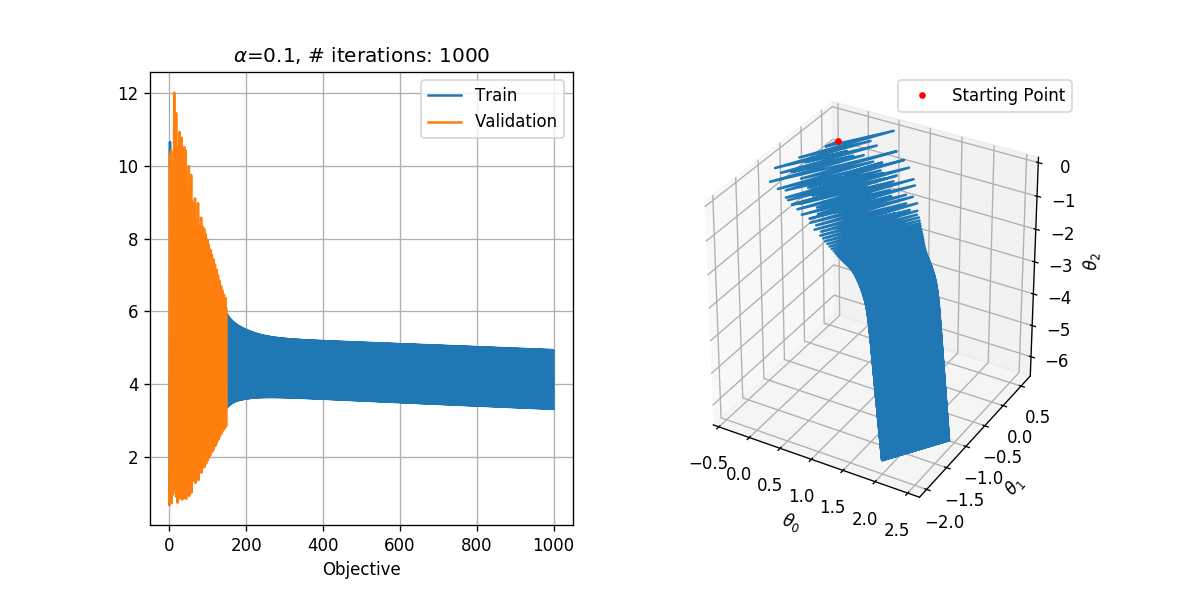

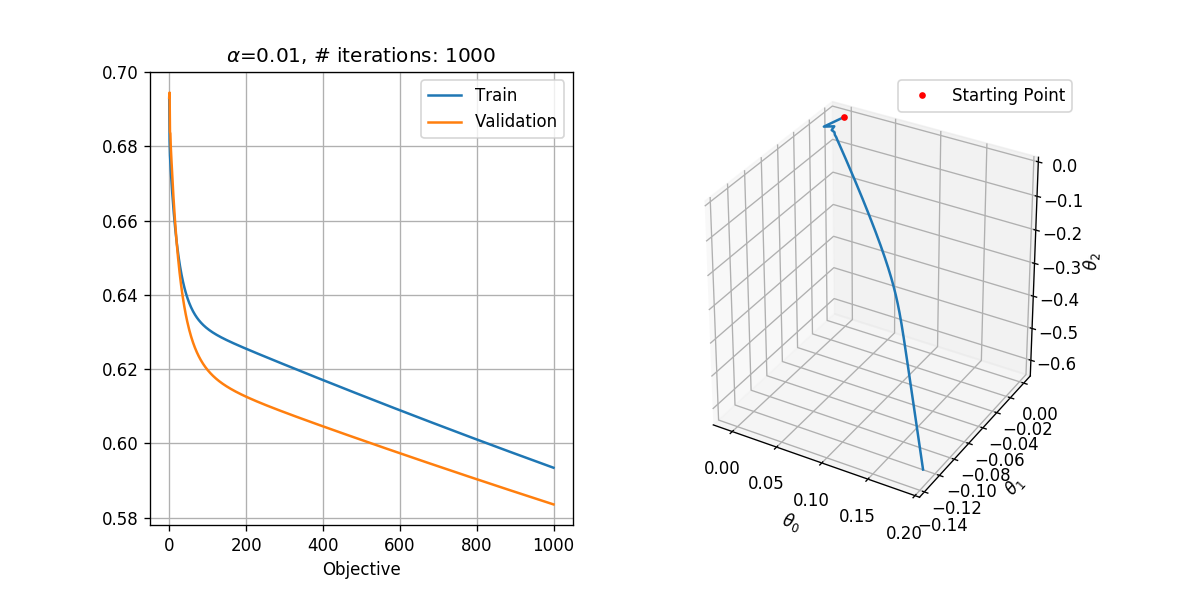

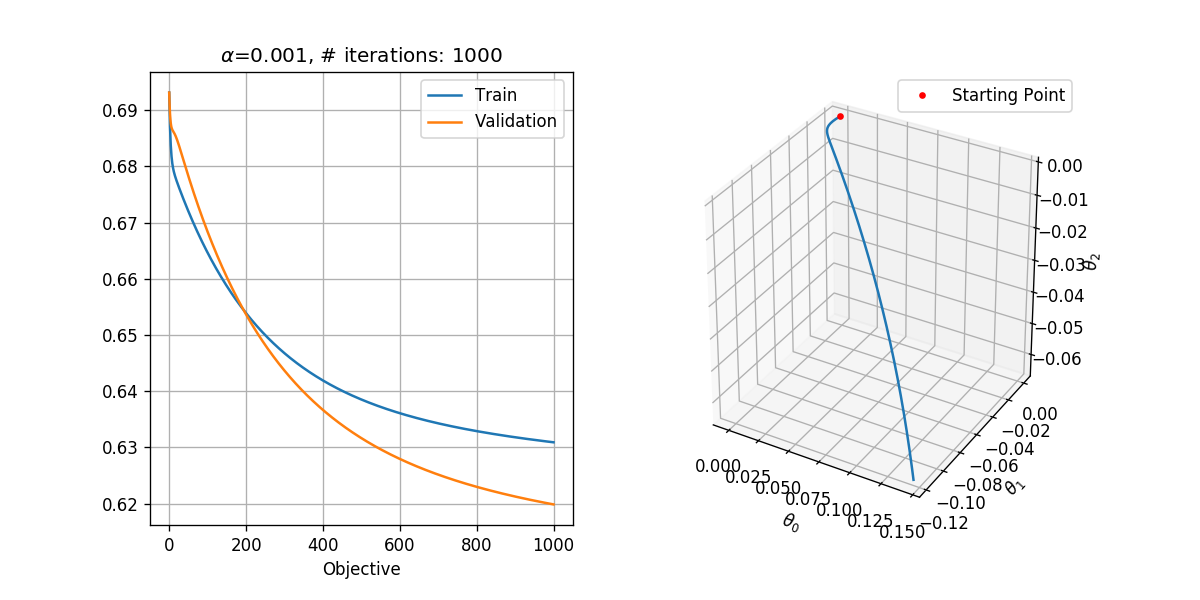

In [ ]:
## Running over the learning rates alpha
tol = 1e-6
max_iter = 1000

for alpha in (1e-1, 1e-2, 1e-3):
    basic_gradient_decent(h, grad_h, alpha, tol, max_iter, x_tilde_train, y_train, x_tilde_val, y_val)

In general, we would like to select the highest learning rate, which does not diverge.

Looking at the results, it seems as if:
- $\alpha=10^{-1}$ is too high. It results in the divergence of the algorithm. Although $\boldsymbol{\theta}$ moves in the general right direction, it keeps on jumping from side to side jumping over the area where the objective is probably low and is unable to enter that area.
- $\alpha=10^{-3}$ is too low. It does not result in divergence, but it is 10 times slower than $\alpha=10^{-2}$. After 1000 steps it has produced the results which $\alpha=10^{-2}$ has produced after only 100 steps.
- $\alpha=10^{-2}$ seems to be ok, and we could probably even use a slightly higher learning rate.

### Running with $\alpha=10^{-2}$

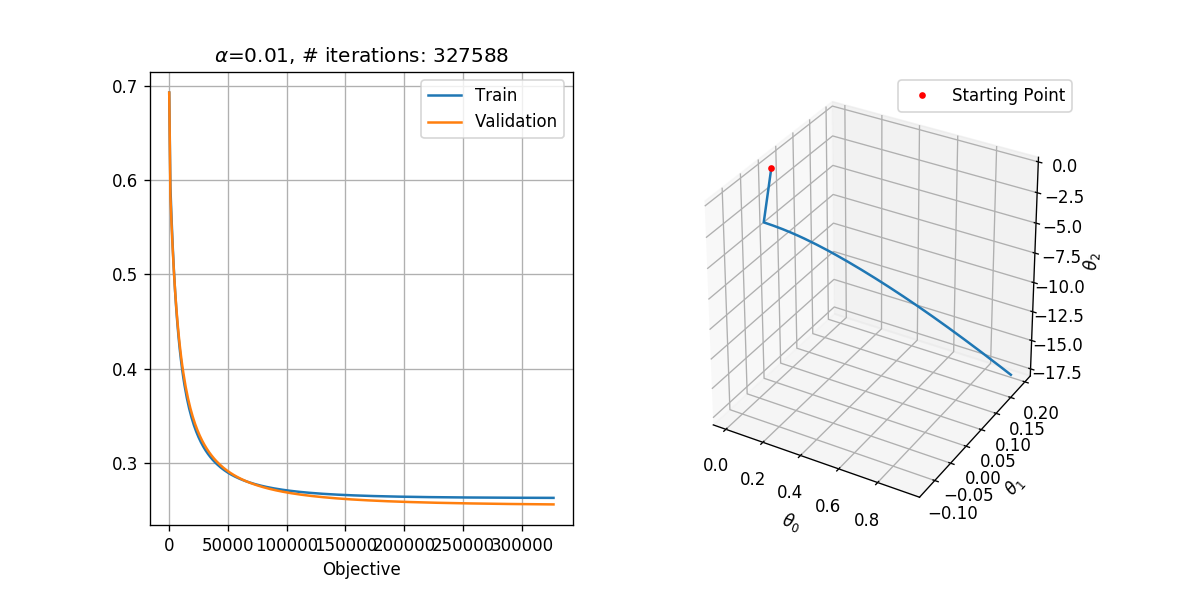

In [ ]:
tol = 1e-8
max_iter = 1000000
alpha = 1e-2

theta = basic_gradient_decent(h, grad_h, alpha, tol, max_iter, x_tilde_train, y_train, x_tilde_val, y_val, store_every=1000)

## Evaluate the risk on the train set
train_prediction = x_tilde_train @ theta > 0
train_risk = (train_prediction != y_train).mean()

print_math('The train risk is: ${:.2}$'.format(train_risk))

### Plotting the discrimination rule

Let us plot the resulting discrimination rule.

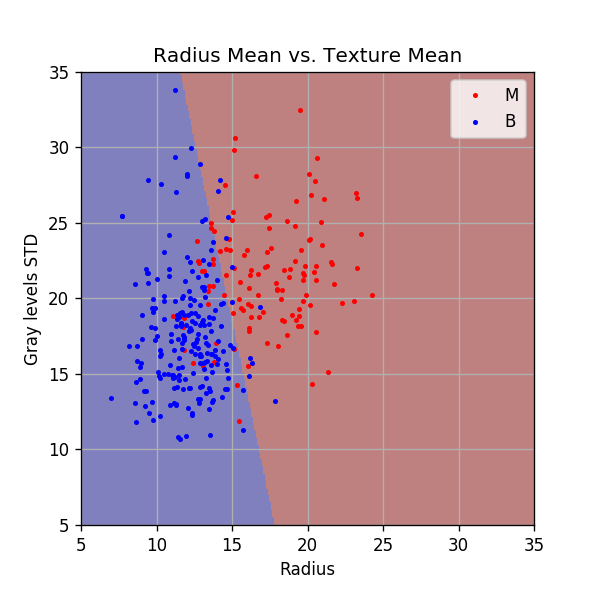

In [ ]:
x1_grid, x2_grid = np.meshgrid(np.arange(5, 35 + 1e-9, 0.1), np.arange(5, 35 + 1e-9, 0.1))

predict = (theta[0] * x1_grid + theta[1] * x2_grid + theta[2]) > 0

fig, ax = plt.subplots()
ax.imshow(predict, extent=[x1_grid.min(), x1_grid.max(), x2_grid.max(), x2_grid.min()], cmap='jet', alpha=0.5)
ax.plot(x_train[y_train==1, 0], x_train[y_train==1, 1],'.r', markersize=4, label='M')
ax.plot(x_train[y_train==0, 0], x_train[y_train==0, 1],'.b', markersize=4, label='B')
ax.set_xlim(x1_grid.min(), x1_grid.max())
ax.set_ylim(x2_grid.min(), x2_grid.max())
ax.grid(True)
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD')
ax.legend();

## ⏱️ Performance evaluation

In [ ]:
## Evaluate the risk on the test set
test_prediction = x_tilde_test @ theta  > 0
test_risk = (test_prediction != y_test).mean()

print_math('The test risk is: ${:.2}$'.format(test_risk))

## Using scikit-learn - SGDClassifier

The [sklearn.linear_model.SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) class implements, among others, the linear logistic regression method using a Stochastic Gradient Descent (SGD) optimization. We shall point out a few notes regarding this class:

### Stochastic Gradient Descent (SGD)
**Stochastic Gradient Descent** differs from the basic gradient descent in the fact that in each update step only one sample from the dataset is used instead of the entire dataset. The single samples are selected in each step randomly from the dataset.

### Selecting the loss function
This class supports a range of linear models which can be selected using the **loss** argument. The linear logistic model can be selected be setting: **loss='log'**.

### Regularization
By default, **SGDClassifier** adds an $L2$ regularization term. Different regularization terms can be selected using the **penalty** argument, including **penalty='none'** for no regularization.

### Adaptive learning rates
By default, **SGDClassifier** uses a slightly more sophisticated version of the gradient descent algorithm, in which the learning rate changes over time. The manner in which the learning rate changes can be define using the **learning_rate** argument, including **learning_rate='constant'**.

For **learning_rate='constant'** the value of the learning rate constant, $\alpha$, is defined by the argument **eta0**.

Let us re-run the algorithm using **SGDClassifier** and the same parameters:

In [ ]:
from sklearn.linear_model import SGDClassifier

tol = 1e-8
max_iter = 100000
alpha = 1e-3

## Create the classifier object
## eta0 here is the
clf = SGDClassifier(loss='log',
                    penalty='none',
                    max_iter=max_iter,
                    tol=tol,
                    learning_rate='constant',
                    eta0=alpha,
                    n_iter_no_change=100,
                    random_state=0)

## Train the classifier
clf.fit(x_train, y_train)
print('Number of iterations performed: {}'.format(clf.n_iter_))

## Evaluate the risk on the train set
train_prediction = clf.predict(x_train)
train_risk = (train_prediction != y_train).mean()

print_math('The train risk is: ${:.2}$'.format(train_risk))

## Evaluate the risk on the test set
test_prediction = clf.predict(x_test)
test_risk = (test_prediction != y_test).mean()

print_math('The test risk is: ${:.2}$'.format(test_risk))

Number of iterations performed: 1238


We got the same results as we got using our implementation (but much faster).

## Using scikit-learn - LogisticRegression

Specifically, for the case of linear logistic regression, there exist some more optimal optimization algorithms. We will not discuss them here, but we will introduce the [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class which uses these algorithms to train a linear logistic regression model.

Like in the case of **SGDClassifier**, we will use **penalty='none'**. We will use an optimizer called **lbfgs** to solve the optimization problem.

In [ ]:
from sklearn.linear_model import LogisticRegression

## Create the classifier object
clf = LogisticRegression(penalty='none', solver='lbfgs', random_state=0)

## Train the classifier
clf.fit(x_train, y_train)

## Evaluate the risk on the train set
train_prediction = clf.predict(x_train)
train_risk = (train_prediction != y_train).mean()

print_math('The train risk is: ${:.2}$'.format(train_risk))

## Evaluate the risk on the test set
test_prediction = clf.predict(x_test)
test_risk = (test_prediction != y_test).mean()

print_math('The test risk is: ${:.2}$'.format(test_risk))

Again, we got the same results as we got using our implementation (but much faster).

## Using more features

So far we have used only the first two features, but to get better results, we would like to use all the available measured data. 
As before, let us start increasing the number of features.
We will plot the training risk along with the validation risk as a function of the number features.

/app/dockvenv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/app/dockvenv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/app/dockvenv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


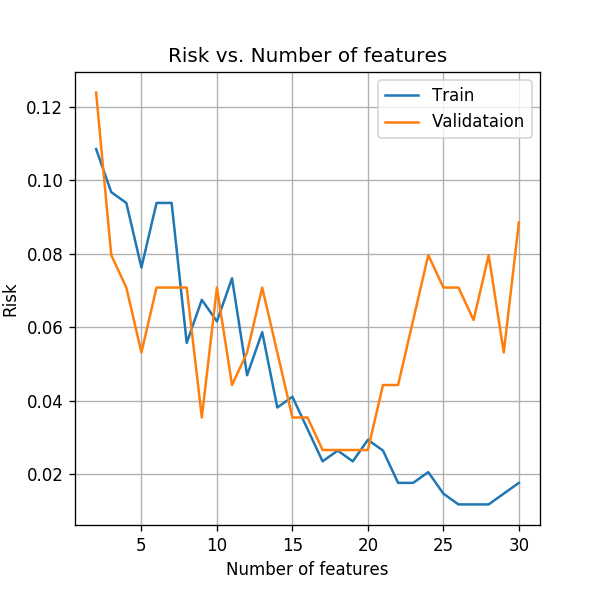

In [ ]:
features_names_list = ['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst']

n_features_grid = np.arange(2, 31)
train_risk_array = np.zeros(len(n_features_grid))
val_risk_array = np.zeros(len(n_features_grid))

## Create the classifier object
clf = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, max_iter=10000)

## Loop over the number of features
for i, n_features in enumerate(n_features_grid):

    x_train = train_set[features_names_list[:n_features]].values
    x_val = validation_set[features_names_list[:n_features]].values

    ## Create and train the classifier object
    clf.fit(x_train, y_train)

    ## Evaluate the risk on the train set
    train_prediction = clf.predict(x_train)
    train_risk_array[i] = (train_prediction != y_train).mean()

    ## Evaluate the risk on the validataion set
    val_prediction = clf.predict(x_val)
    val_risk_array[i] = (val_prediction != y_val).mean()

    
## Evaluate the risk on all features
optimal_number_of_feature = np.argmin(val_risk_array)
x_train = train_set[features_names_list[:n_features]].values
x_test = test_set[features_names_list[:n_features]].values
clf.fit(x_train, y_train)
test_prediction = clf.predict(x_test)
test_risk = (test_prediction != y_test).mean()
print_math('The test risk is: ${:.2}$'.format(test_risk))

fig,ax = plt.subplots()
ax.plot(n_features_grid, train_risk_array, label='Train')
ax.plot(n_features_grid, val_risk_array, label='Validataion');
ax.set_title('Risk vs. Number of features')
ax.set_ylabel('Risk')
ax.set_xlabel('Number of features')
ax.legend();

Similar to the result we got in the case of LDA, we can see that as we increase the number of features the models starts to overfit the data. One option is to only use the first 17 features before the results start to degrade due to the overfit. This selection is obviously not optimal since the order of the features was randomly selected and the first 17 are not necessarily the optimal sub set of features.

As we was in the last workshop, we can partially reduce the overfitting by adding a regularization term to the optimization problem. Specifically by adding an $L1$ regularization, we encourage the optimization to use only a sparse set of features.

Let us first take a look at the distribution of features coefficients (the model's parameters) without the regularization.

0) radius_mean: 3.3%
1) texture_mean: 0.0%
2) perimeter_mean: 0.1%
3) area_mean: 0.0%
4) smoothness_mean: 7.6%
5) compactness_mean: 7.0%
6) concavity_mean: 4.6%
7) concave points_mean: 7.7%
8) symmetry_mean: 10.3%
9) fractal_dimension_mean: 0.2%
10) radius_se: 0.9%
11) texture_se: 0.6%
12) perimeter_se: 0.1%
13) area_se: 0.1%
14) smoothness_se: 1.3%
15) compactness_se: 8.4%
16) concavity_se: 10.2%
17) concave points_se: 0.6%
18) symmetry_se: 2.8%
19) fractal_dimension_se: 1.7%
20) radius_worst: 1.1%
21) texture_worst: 0.1%
22) perimeter_worst: 0.0%
23) area_worst: 0.0%
24) smoothness_worst: 14.9%
25) compactness_worst: 0.0%
26) concavity_worst: 1.1%
27) concave points_worst: 8.3%
28) symmetry_worst: 4.6%
29) fractal_dimension_worst: 2.3%


/app/dockvenv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


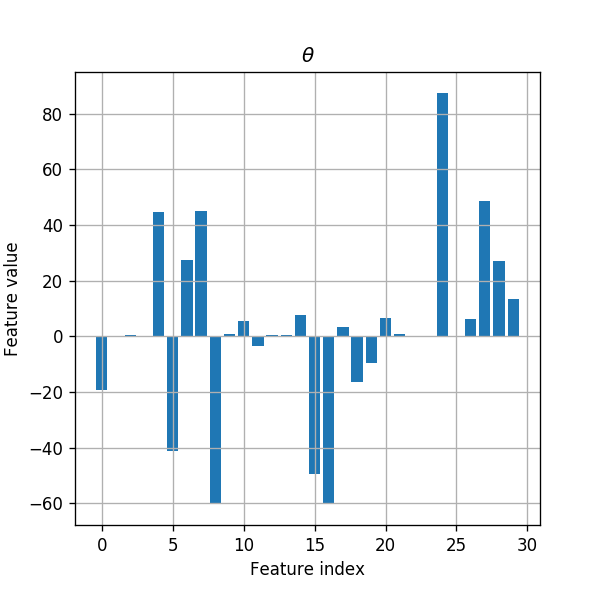

In [ ]:
## Create the classifier object
clf = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, max_iter=10000)
x_train = train_set[features_names_list].values
clf.fit(x_train, y_train)

coeffs_distribution = np.abs(clf.coef_[0]) / np.abs(clf.coef_[0]).sum()

for i in range(len(features_names_list)):
    print('{}) {}: {:.1f}%'.format(i, features_names_list[i], coeffs_distribution[i] * 100))

## plot parameters
fig, ax = plt.subplots()
ax.set_title('$\\theta$')
ax.bar(np.arange(len(clf.coef_[0])), clf.coef_[0])
ax.grid(True)
ax.set_xlabel('Feature index')
ax.set_ylabel('Feature value');

We can see that the coefficient speared all over the 30 features.

Let us now fit the model using an $L1$ regularization:

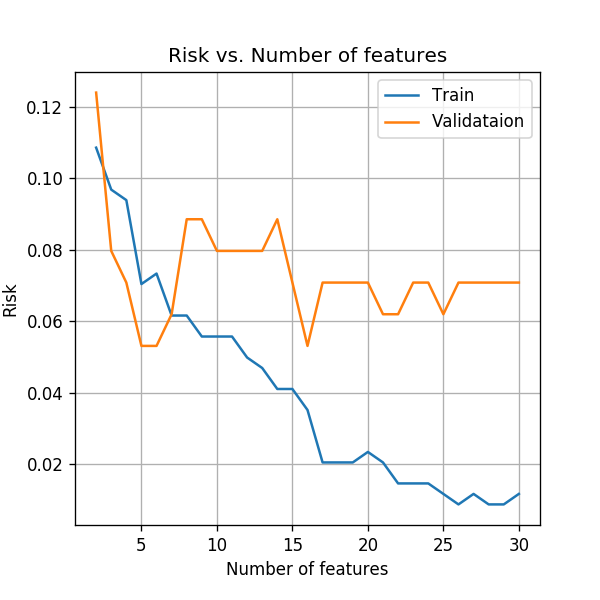

In [ ]:
features_names_list = ['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst']

n_features_grid = np.arange(2, 31)
train_risk_array = np.zeros(len(n_features_grid))
val_risk_array = np.zeros(len(n_features_grid))

## Create the classifier object
clf = LogisticRegression(penalty='l1', C=500, solver='liblinear', random_state=0, max_iter=10000)

## Loop over the number of features
for i, n_features in enumerate(n_features_grid):

    x_train = train_set[features_names_list[:n_features]].values
    x_val = validation_set[features_names_list[:n_features]].values

    ## Create and train the classifier object
    clf.fit(x_train, y_train)

    ## Evaluate the risk on the train set
    train_prediction = clf.predict(x_train)
    train_risk_array[i] = (train_prediction != y_train).mean()

    ## Evaluate the risk on the validataion set
    val_prediction = clf.predict(x_val)
    val_risk_array[i] = (val_prediction != y_val).mean()

## Evaluate the risk on the full list of features
x_train = train_set[features_names_list].values
x_test = test_set[features_names_list].values
clf.fit(x_train, y_train)
test_prediction = clf.predict(x_test)
test_risk = (test_prediction != y_test).mean()
print_math('The test risk is: ${:.2}$'.format(test_risk))

fig,ax = plt.subplots()
ax.plot(n_features_grid, train_risk_array, label='Train')
ax.plot(n_features_grid, val_risk_array, label='Validataion');
ax.set_title('Risk vs. Number of features')
ax.set_ylabel('Risk')
ax.set_xlabel('Number of features')
ax.legend();

We can see that the regularization has indeed reduced the amount of overfitting and was able to improve the test risk.

Let us also look at the distribution of features in the regularized case:

0) radius_mean: 0.3%
1) texture_mean: 0.1%
2) perimeter_mean: 0.0%
3) area_mean: 0.0%
4) smoothness_mean: 13.3%
5) compactness_mean: 9.9%
6) concavity_mean: 0.0%
7) concave points_mean: 21.4%
8) symmetry_mean: 7.1%
9) fractal_dimension_mean: 0.0%
10) radius_se: 1.7%
11) texture_se: 0.1%
12) perimeter_se: 0.1%
13) area_se: 0.0%
14) smoothness_se: 0.0%
15) compactness_se: 0.0%
16) concavity_se: 8.1%
17) concave points_se: 20.6%
18) symmetry_se: 4.3%
19) fractal_dimension_se: 0.0%
20) radius_worst: 0.1%
21) texture_worst: 0.0%
22) perimeter_worst: 0.0%
23) area_worst: 0.0%
24) smoothness_worst: 1.9%
25) compactness_worst: 0.2%
26) concavity_worst: 1.6%
27) concave points_worst: 0.0%
28) symmetry_worst: 2.9%
29) fractal_dimension_worst: 6.4%


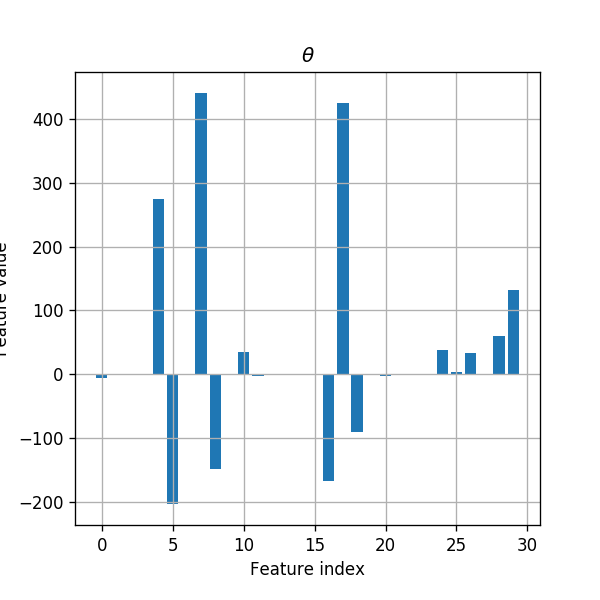

In [ ]:
coeffs_distribution = np.abs(clf.coef_[0]) / np.abs(clf.coef_[0]).sum()

for i in range(len(features_names_list)):
    print('{}) {}: {:.1f}%'.format(i, features_names_list[i], coeffs_distribution[i] * 100))

## plot parameters
fig, ax = plt.subplots()
ax.set_title('$\\theta$')
ax.bar(np.arange(len(clf.coef_[0])), clf.coef_[0])
ax.grid(True)
ax.set_xlabel('Feature index')
ax.set_ylabel('Feature value');

We can see here that adding an $L1$ regularization indeed result in a sparser result.

In [ ]:
%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->